In [1]:
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = imread("./data/FISH_RGB.TIF")[:500, :500]
print(image.shape)

(500, 500, 3)


(-0.5, 499.5, 499.5, -0.5)

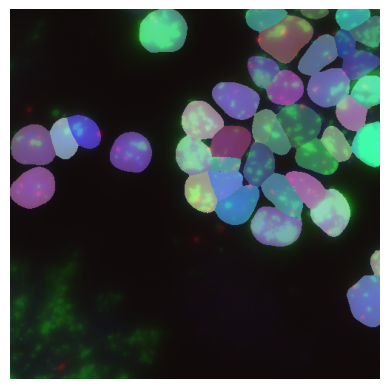

In [7]:
from CellPatchExtraction.src.extraction import extract_patches
from cellpose.models import CellposeModel
from cellplot.patches import gridPlot
from cellplot.segmentation import rand_col_seg
import torch

return_vals = extract_patches(
    image, 
    "CP_TU", 
    cellpose_kwargs={"diameter": 50}, 
    min_size=10,
    max_size=10000,
    patch_size=128, 
    nuclear_channel=2,
    device=torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu"),
    use_surrounding=True,
    exclude_edges=False,
    return_all=True)

plt.imshow(image)
plt.imshow(rand_col_seg(segmentation), alpha=0.5)
plt.axis("off")

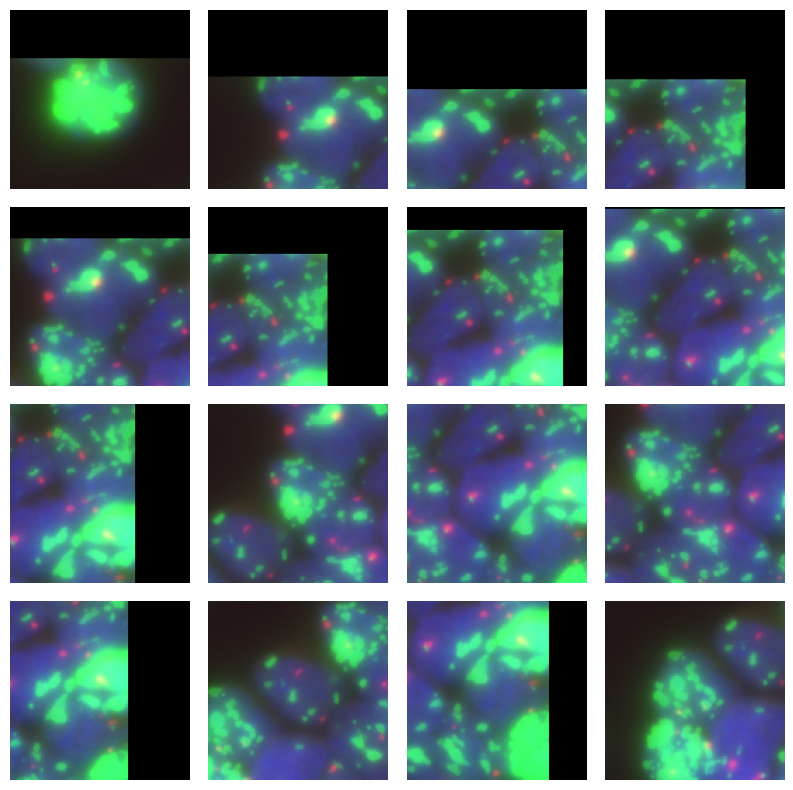

In [8]:
gridPlot(patches, channels_to_show=[0, 1, 2], layout="auto", grid_size=(4, 4))